# Intro to Machine learning

Machine learning is the subfield of computer science that gives "Computers the ability to learn without being explicity programmed"

**Major machine learning techniques**

* Regression/Estimation
  * Predicting continuous values
* Classification
  * Predicting the item class/category of a case
* Clustering
  * Finding the structure of data / summarization
* Associations
  * Associating frequent co-occurring items/events
* Anomaly detection
  * discovering abnormal and unusual cases
* Sequence mining
  * predicting next events; click-stream (Markov model, HMM)
* Dimension reduction
  * Reducing the size of data (PCA)
* Recommendation system
  * Recommending items

**Difference between Artificial intelligence, machine learning and deep learning**

* AI
  * Computer vision
  * Language processing
  * Creativity
* Machine learning
  *Classification
  * Regression
*Revolution of ML
  * Deep Learning

**Supervised and unsupervised Learning**

* Supervised learning
  * Classification label data
  * Regression
  * Controlled enviroment

* Unsupervised learning
  * Dimension reduction
  * Density estimation
  * Market basket analysis
  * Clustering
  * Less controlled enviroment

# Regression

**Linear Regression**

X: independent variable

y: dependent variable

$\hat{y} = \theta_0 + \theta_1 x$ 

* $\hat{y}$: response variable / predicted value
* $\theta_0$: Intercept
* $\theta_1$: slope / gradient
* $x$: a single predictor



In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-11-10 16:46:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2021-11-10 16:46:45 (2.20 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

**Understanding the data**

In [ ]:
df.to_csv("FuelConsumption.csv")

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
df["MAKE"].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
TOYOTA           49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [ ]:
df.shape

(1067, 13)

**Data exploration**

In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

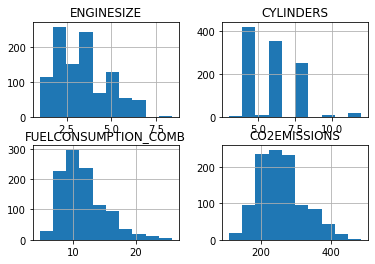

In [ ]:
cdf.hist()
plt.show()

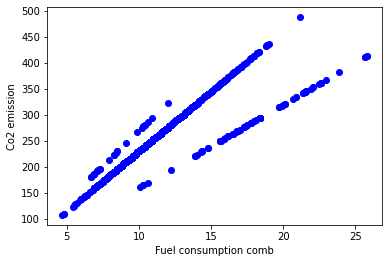

In [ ]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color = "blue")
plt.xlabel("Fuel consumption comb")
plt.ylabel("Co2 emission")
plt.show()

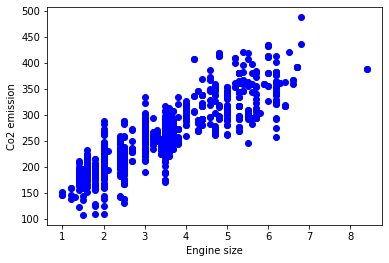

In [ ]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Co2 emission")
plt.show()

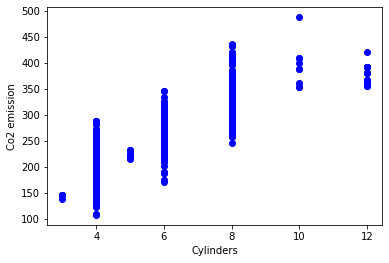

In [ ]:
plt.scatter(cdf["CYLINDERS"], cdf["CO2EMISSIONS"], color = "blue")
plt.xlabel("Cylinders")
plt.ylabel("Co2 emission")
plt.show()

**Creating train and test dataset**

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

**Simple linear reggresion**

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

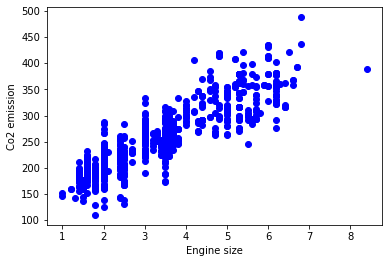

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Co2 emission")
plt.show()

**Modeling**


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

lr.fit(train_x, train_y)
b0 = lr.intercept_
b1 = lr.coef_
print("the coefficients: {} and the intercept: {}".format(b1, b0))

the coefficients: [[38.88365378]] and the intercept: [126.1577932]


$CO_2 = 38.8836 * Enginesize + 126.1577$ 

Text(0, 0.5, 'Co2 emission')

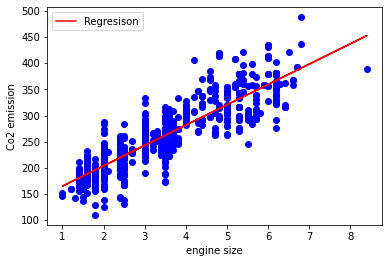

In [ ]:
plt.scatter(train_x, train_y, color = "blue")
plt.plot(train_x, b0 + b1 * train_x, color ="red", label = "Regresison")
plt.legend()
plt.xlabel("engine size")
plt.ylabel("Co2 emission")

**Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

* **Mean Absolute Error**: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* **Mean Squared Error (MSE)**: Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* **Root Mean Squared Error (RMSE)**.

* **R-squared** is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
pred_y = lr.predict(test_x)

#MAE
mae = np.mean(np.absolute(pred_y - test_y))
#MSE
mse = np.mean((pred_y - test_y) ** 2)
#R2
R = r2_score(pred_y, test_y)
print("Mean abosulte error: {}".format(mae))
print("Residual sum of squares (MSE): {}". format(mse))
print("R square: {}".format(R))

Mean abosulte error: 24.708759332010626
Residual sum of squares (MSE): 1044.6395137483037
R square: 0.6243861267769711


**Multiple Linear Regression**

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

$\hat{y} = \theta^T X$

$X = [1; x_1; x_2;x_3]$

* how to estimate $\theta$
  * Ordinary least square
    * ordinary algebra operations 
    * takes a long time for large datasets
  * an optimization algoritm
    * Gradient descent
    * 

In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
cdf = df[['ENGINESIZE', 'CYLINDERS',  'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


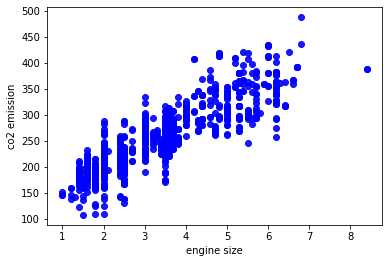

In [ ]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color = "blue", alpha = 0.9)
plt.xlabel("engine size")
plt.ylabel("co2 emission")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

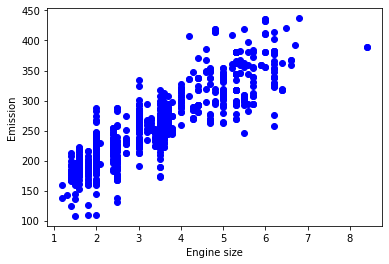

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Multiple regression model**

*First model* 

predict Co2 with the features: fuelconsumption_comb, enginesize and cylinders

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_1 = LinearRegression()
x_train_1 = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
#The y is the same in all the models for this excercise
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

lr_1.fit(x_train_1, y_train)

print("The coefficients: {}".format(lr_1.coef_))
print("The intercept: {}".format(lr_1.intercept_))

The coefficients: [[12.23944285  6.54458004  9.36844877]]
The intercept: [69.14955622]


$\hat{y} = 69.14 + 12.23*Enginesize + 6.54 * Cylinders + 9.36 * Fuelconsumptioncom$ 

**Ordinary least squares OLS**

**OLS** is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

**Prediction**

In [ ]:
x_test_1 = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y_pred_1 = lr_1.predict(x_test_1)
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

print("Residual sum of squares: {}".format(np.mean((y_pred_1 - y_test)**2)))
print("Variance score: {}".format(lr_1.score(x_test_1, y_test)))

Residual sum of squares: 632.6048235736449
Variance score: 0.8639050997080592


**Explained variance regression score**

Let  𝑦̂   be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$explained variance(y, \hat{y}) = 1 - \frac{Var y - \hat{y}}{Var y}$

*second model* 

predict Co2 with the features: fuelconsumption_city, enginesize and cylinders

In [ ]:
lr_2 = LinearRegression()
x_train_2 = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

lr_2.fit(x_train_2, y_train)

print("The coefficients: {}".format(lr_2.coef_))
print("the intercept: {}".format(lr_2.intercept_))

x_test_2 = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])
y_pred_2 = lr_2.predict(x_test_2)

print("The residual sum of squares: {}".format(np.mean((y_pred_2 - y_test)**2)))
print("the variance: {}".format(lr_2.score(x_test_2, y_test)))

The coefficients: [[12.24295061  6.15499846  6.25287182  2.79518296]]
the intercept: [70.24649532]
The residual sum of squares: 633.5723184579243
the variance: 0.8636969585195916


$\hat{y} = 70.24 + 12.24 * Enginesize + 6.15 * Cylinders + 6.25 * fuelConsumption_{CITY} + 2.79 *fuelconsumption_{HWY}$

**Polynomial regression**

In [ ]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


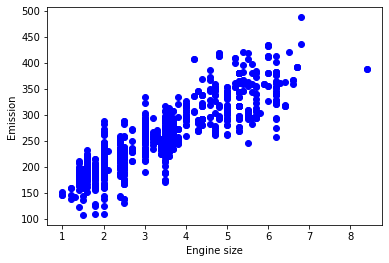

In [ ]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

$y = \theta_0 + \theta_1 x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform**

takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$[u_1] = [1, u_1, u^{2}_{1}]$

Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the 2nd degree equation would be turn into:
* $x_1 = x$
* $x_2 = x^2$

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

In [ ]:
clf = LinearRegression()
clf.fit(x_train_poly, y_train)
theta_0 = clf.intercept_
theta = clf.coef_
print("the coefficients: {}".format(theta))
print("the intercept: {}".format(theta_0))

the coefficients: [[ 0.         50.23948629 -1.50557504]]
the intercept: [107.5081517]


In [ ]:
theta[0][0]

0.0

$CO_2 emisisons = 107.50 + 50.23 * enginesize - 1.50 * enginesize^2$

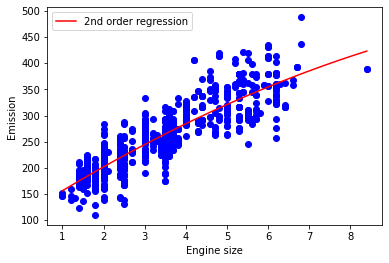

In [ ]:
x = np.linspace(min(x_train), max(x_train), len(x_train))
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(x, theta_0 + theta[0][1] * x + theta[0][2] * x ** 2, color = "red", label = "2nd order regression")
plt.xlabel("Engine size")
plt.legend()
plt.ylabel("Emission")
plt.show()

**Evaluation**



In [ ]:
from sklearn.metrics import r2_score

In [ ]:
x_test_poly = poly.fit_transform(x_test)
y_pred = clf.predict(x_test_poly)

print("Mean absolute error: {}".format(np.mean(np.absolute((y_pred - y_test)))))
print("Residual sum of error: {}".format(np.mean((y_pred - y_test)**2)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))

Mean absolute error: 22.54064202518215
Residual sum of error: 952.6715155226099
R2 score: 0.7622502950926997


the coefficients: [[ 0.         25.98590084  5.13424493 -0.54735149]]
the intercept: [133.41764144]


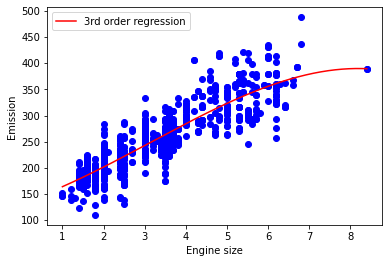

Mean absolute error: 22.603539952006354
Residual sum of error: 956.2773526570397
R2 score: 0.7613504185868044


In [ ]:
poly = PolynomialFeatures(degree = 3)

x_train_poly_3 = poly.fit_transform(x_train)
clf_3 = LinearRegression()
clf_3.fit(x_train_poly_3, y_train)
theta_0 = clf_3.intercept_
theta = clf_3.coef_
print("the coefficients: {}".format(theta))
print("the intercept: {}".format(theta_0))

x = np.linspace(min(x_train), max(x_train), len(x_train))
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"],  color='blue')
plt.plot(x, theta_0 + theta[0][1] * x + theta[0][2] * x ** 2 + theta[0][3] * x**3, color = "red", label = "3rd order regression")
plt.xlabel("Engine size")
plt.legend()
plt.ylabel("Emission")
plt.show()

x_test_poly = poly.fit_transform(x_test)
y_pred = clf_3.predict(x_test_poly)

print("Mean absolute error: {}".format(np.mean(np.absolute((y_pred - y_test)))))
print("Residual sum of error: {}".format(np.mean((y_pred - y_test)**2)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))

**Non linear regression**

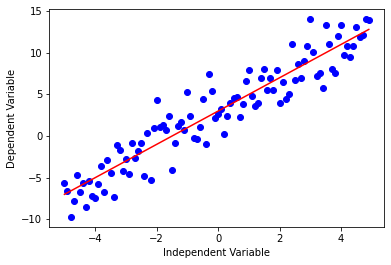

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Examples of non liner regression**

* $y = ax^3 + bx^2 +cx +d$
* $y = log(x)$
* $y = log(ax^3 + bx^2 +cx +d)$

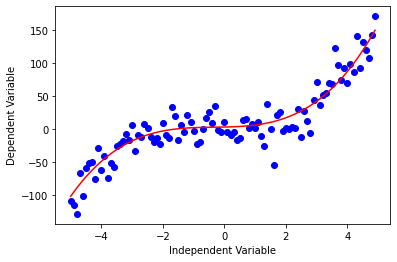

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

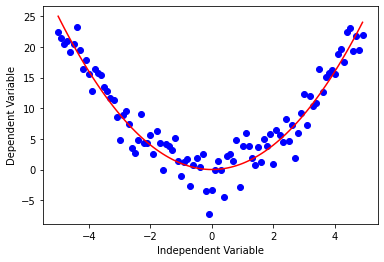

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Exponential**

* $Y = a + bc^x$  where b is different of 0, c>0

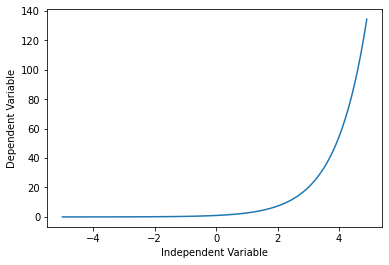

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Logaritmic**

* $y = log(x)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


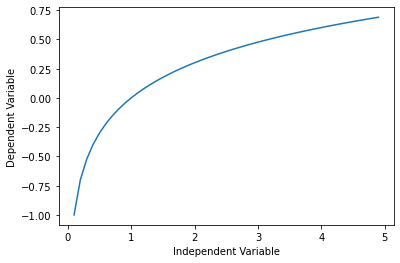

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log10(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Sigmoidal/logistic**

* $Y = a + \frac{b}{1 + c^{(X-d)}}$

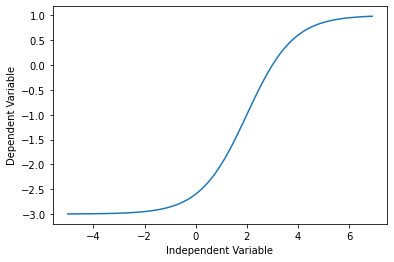

In [ ]:
X = np.arange(-5.0, 7.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [ ]:
#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-11-10 21:38:16 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


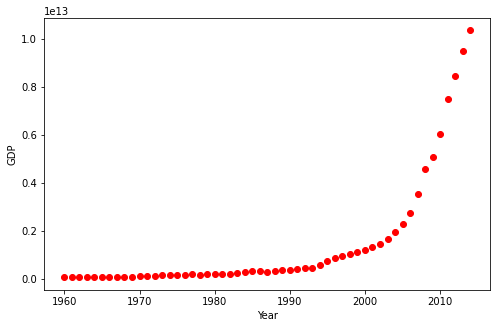

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

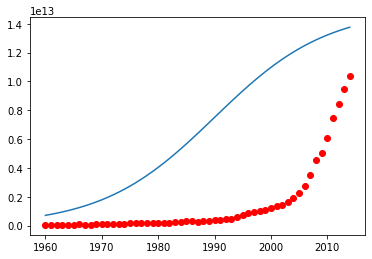

In [ ]:
beta_1 = 0.10
beta_2 = 1990.0


Y_pred = sigmoid(x_data, beta_1 , beta_2)


plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [ ]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


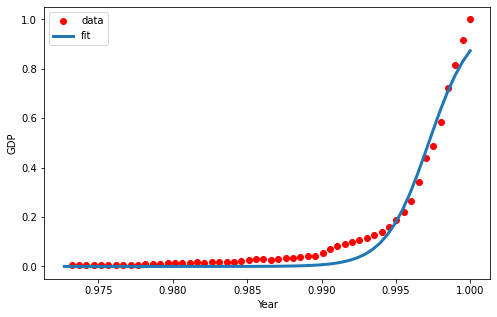

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [ ]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
